# Problem Description


#### References:
- [Determining optimal threshold from ROC curve](https://stats.stackexchange.com/questions/123124/how-to-determine-the-optimal-threshold-for-a-classifier-and-generate-roc-curve)

<a href="https://colab.research.google.com/github/paulaceccon/ml-helper-scripts/blob/main/notebooks/best_threshold_roc_curve.ipynb" target="_parent" style="float: left;"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
clf = LogisticRegression(solver="liblinear").fit(X_train, y_train)
y_scores = clf.predict_proba(X_test)
clf.score(X_test, y_test)

0.9649122807017544

In [3]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

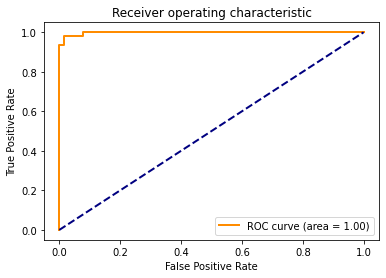

In [4]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");

In [5]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", np.round(optimal_threshold, 2))

Threshold value is: 0.72


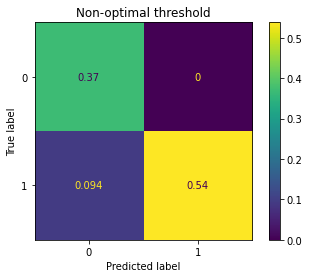

In [6]:
y_pred = y_scores[:, 1] >= 0.9
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="all")
plt.title('Non-optimal threshold');

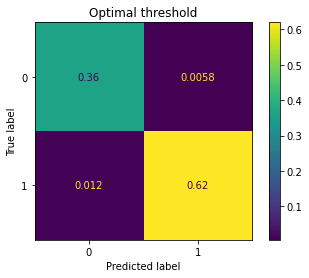

In [7]:
y_pred = y_scores[:, 1] > 0.71
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize="all")
plt.title('Optimal threshold');